In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [17]:
X, y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

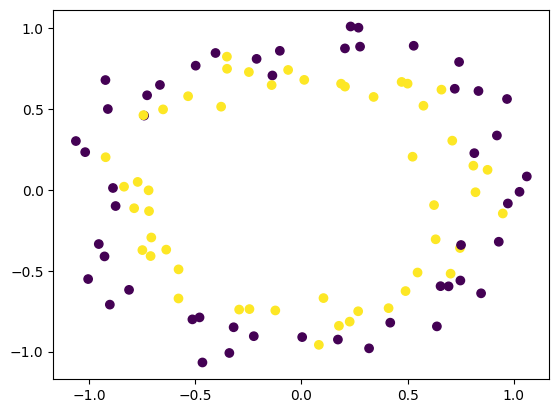

In [18]:
# # import seaborn as sns

# # Combine the columns into a single array-like object
# combined_X = X[:, [0, 1]]

# # Plot the scatterplot
# sns.scatterplot(combined_X[:, 0], combined_X[:, 1], hue=y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [20]:
model = Sequential()

In [21]:
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, verbose = 0)

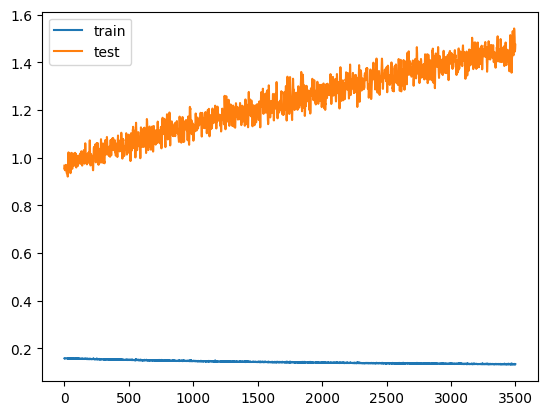

In [30]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


TypeError: ignored

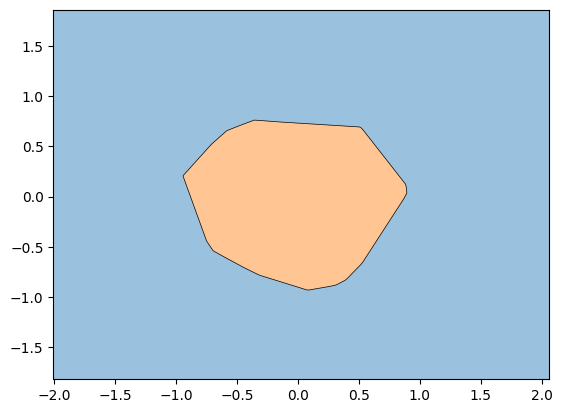

In [32]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)

EARLY STOPPING

In [33]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20, 
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [37]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
3/3 [==============================] - 2s 244ms/step - loss: 0.6880 - accuracy: 0.5625 - val_loss: 0.7059 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6850 - accuracy: 0.5375 - val_loss: 0.7094 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6837 - accuracy: 0.5375 - val_loss: 0.7142 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6817 - accuracy: 0.5375 - val_loss: 0.7178 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6804 - accuracy: 0.5375 - val_loss: 0.7209 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6793 - accuracy: 0.5375 - val_loss: 0.7224 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6784 - accuracy: 0.5375 - val_loss: 0.7241 - val_accuracy: 0.3500
Epoch 8/3500

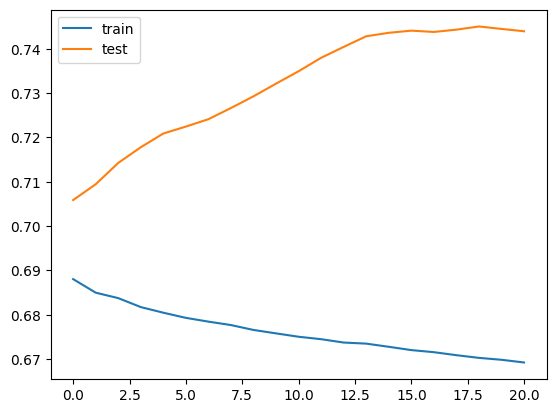

In [38]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()